In [40]:

import pandas as pd
import datetime
import csv
import re
from pyFTS.partitioners import CMeans, Grid, FCM, Huarng, Entropy, Util as pUtil
from pyFTS.common import Membership as mf
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.data import Enrollments
from pyFTS.common import Transformations
from pyFTS.data import TAIEX
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
tdiff = Transformations.Differential(1)
dataset = TAIEX.get_data()
dataset_diff = tdiff.apply(dataset)

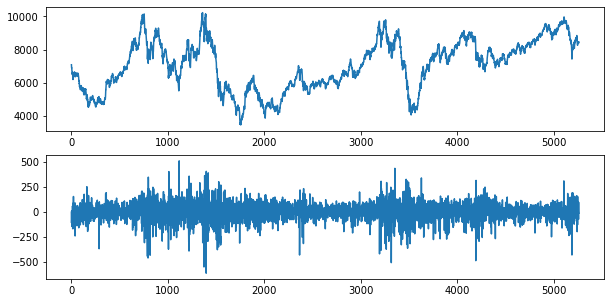

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[10,5])
ax[0].plot(dataset)
ax[1].plot(dataset_diff)

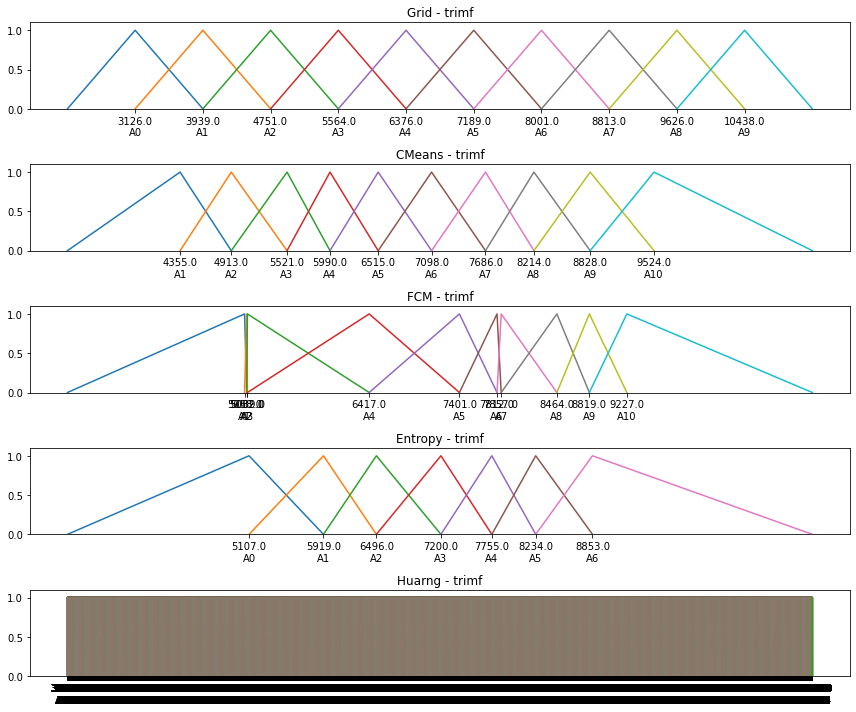

In [11]:
part = pUtil.explore_partitioners(dataset, 10, methods=[Grid.GridPartitioner, CMeans.CMeansPartitioner, 
                                                           FCM.FCMPartitioner, Entropy.EntropyPartitioner,
                                                           Huarng.HuarngPartitioner], 
                                  mf=[mf.trimf])

In [8]:
train = Enrollments.get_data()
tdiff = Transformations.Differential(1)
fs = Grid.GridPartitioner(data=train, npart=20)
print(fs)


Grid:
A0: trimf([11273.44, 11749.5, 12225.56])
A1: trimf([11749.5, 12225.56, 12701.619999999999])
A2: trimf([12225.56, 12701.619999999999, 13177.679999999998])
A3: trimf([12701.619999999999, 13177.679999999998, 13653.739999999998])
A4: trimf([13177.679999999998, 13653.739999999998, 14129.799999999997])
A5: trimf([13653.739999999998, 14129.799999999997, 14605.859999999997])
A6: trimf([14129.799999999997, 14605.859999999997, 15081.919999999996])
A7: trimf([14605.859999999997, 15081.919999999996, 15557.979999999996])
A8: trimf([15081.919999999996, 15557.979999999996, 16034.039999999995])
A9: trimf([15557.979999999996, 16034.039999999995, 16510.099999999995])
A10: trimf([16034.039999999995, 16510.099999999995, 16986.159999999996])
A11: trimf([16510.099999999995, 16986.159999999996, 17462.219999999998])
A12: trimf([16986.159999999993, 17462.219999999994, 17938.279999999995])
A13: trimf([17462.21999999999, 17938.27999999999, 18414.339999999993])
A14: trimf([17938.27999999999, 18414.339999999

In [19]:
fs[0].centroid

20

In [9]:
from pyFTS.models import chen
model = chen.ConventionalFTS(partitioner=fs)
model.fit(train)
print(model)



Conventional FTS:
A3 -> A4
A4 -> A4,A6
A6 -> A8
A8 -> A7,A8,A9
A7 -> A7,A8,A9
A10 -> A8
A9 -> A11
A11 -> A10,A11,A13
A13 -> A15
A16 -> A15,A16
A15 -> A16



In [12]:
train

array([13055, 13563, 13867, 14696, 15460, 15311, 15603, 15861, 16807,
       16919, 16388, 15433, 15497, 15145, 15163, 15984, 16859, 18150,
       18970, 19328, 19337, 18876], dtype=int64)

In [ ]:
size = len(fs)
memship = np.zeros([len(train), size])
j = 0
for t in train:
    for i in range(0,size):
        u = fs[i].upper
        l = fs[i].lower
        c = fs[i].centroid
        m = mf.trimf(t, [l,c,u])
        memship[j][i] = m
        print(t,l,c,u, m)
    j = j + 1
    

In [31]:
memship

array([[0.        , 0.        , 0.25769861, 0.74230139, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.19060623, 0.80939377,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.55203126,
        0.44796874, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.81065412, 0.18934588, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

In [88]:
train = Enrollments.get_data()
tdiff = Transformations.Differential(1)
fs = Grid.GridPartitioner(data=train, npart=30, func = mf.trimf)
#fs = CMeans.CMeansPartitioner(data=train, npart=10, membership_function = mf.gaussmf)

print(fs)


Grid:
A0: trimf([11432.126666666667, 11749.5, 12066.873333333333])
A1: trimf([11749.5, 12066.873333333333, 12384.246666666666])
A2: trimf([12066.873333333333, 12384.246666666666, 12701.619999999999])
A3: trimf([12384.246666666666, 12701.619999999999, 13018.993333333332])
A4: trimf([12701.619999999999, 13018.993333333332, 13336.366666666665])
A5: trimf([13018.993333333332, 13336.366666666665, 13653.739999999998])
A6: trimf([13336.366666666665, 13653.739999999998, 13971.113333333331])
A7: trimf([13653.739999999998, 13971.113333333331, 14288.486666666664])
A8: trimf([13971.113333333331, 14288.486666666664, 14605.859999999997])
A9: trimf([14288.486666666664, 14605.859999999997, 14923.23333333333])
A10: trimf([14605.859999999997, 14923.23333333333, 15240.606666666663])
A11: trimf([14923.23333333333, 15240.606666666663, 15557.979999999996])
A12: trimf([15240.606666666663, 15557.979999999996, 15875.353333333329])
A13: trimf([15557.979999999996, 15875.353333333329, 16192.726666666662])
A14: tr

In [89]:
fs[1].membership(12055)

0.962588749317314

In [90]:
size = len(fs)
memship = np.zeros([len(train), size])
j = 0
for t in train:
    for i in range(0,size):
        m = fs[i].membership(t)
        memship[j][i] = m
    j = j + 1
    

In [91]:
m = fs[0].membership(13055)
m

0.0

In [92]:
memship

array([[0.        , 0.        , 0.        , 0.        , 0.88654791,
        0.11345209, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.28590934, 0.71409066, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.32804688, 0.67195312, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [93]:
from pyFTS.models import chen
model = chen.ConventionalFTS(partitioner=fs)
model.fit(train)
print(model)


Conventional FTS:
A4 -> A6
A6 -> A7
A7 -> A9
A9 -> A12
A12 -> A11,A12,A13
A11 -> A11,A12,A13
A15 -> A12
A13 -> A16
A16 -> A15,A16,A20
A20 -> A23
A24 -> A22,A24
A23 -> A24

